In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [3]:
#Load the data
df = pd.read_csv("./machine_learning_examples/linear_regression_class/data_1d.csv", header=None, dtype=float, names=['x','y'])

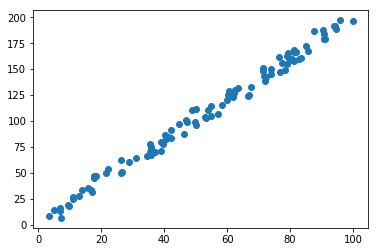

In [4]:
#Graphicate the data
plt.scatter(df['x'],df['y'])
plt.show()

In [5]:
#Apply the equations
x=df['x']
y=df['y']
denominator = x.dot(x)-x.mean()*x.sum()
a=(x.dot(y)-y.mean()*x.sum())/denominator
b=(y.mean()*x.dot(x)-y.dot(x)*x.mean())/denominator

In [6]:
#Replace the values in the equations
yhat=a*x+b

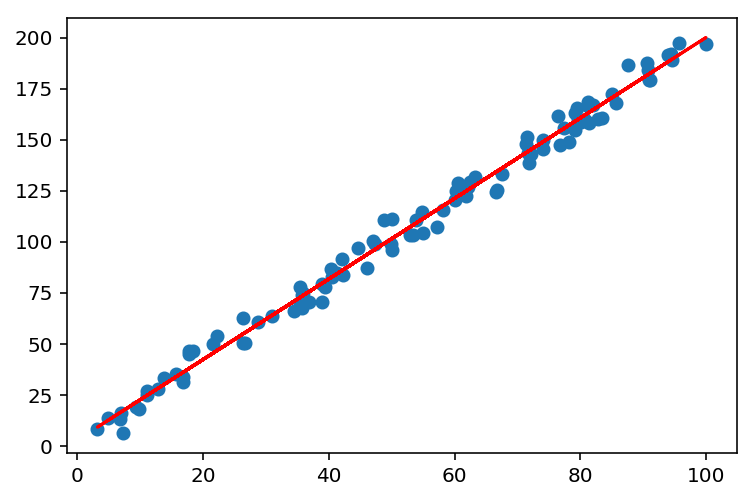

In [7]:
#plor yhat as the line and y as points.
%config InlineBackend.figure_format = 'retina'
plt.scatter(x,y)
plt.plot(x,yhat,color='red')
plt.show()

In [8]:
#Calculate r-squared
d1=y-yhat
d2=y-y.mean()
#the square of the difference is the dot product of the same element
r2=1-d1.dot(d1)/d2.dot(d2)
print("The r-squared is: {}".format(r2))

The r-squared is: 0.9911838202977805


### Demostrate Moore's law

In [9]:
import chardet
with open('./machine_learning_examples/linear_regression_class/moore.csv', 'rb') as f:
    result = chardet.detect(f.readline())
print(result)

{'encoding': 'utf-8', 'confidence': 0.505, 'language': ''}


In [10]:
import csv
x=[]
y=[]
non_decimal=re.compile(r'[^\d]+')
with open("./machine_learning_examples/linear_regression_class/moore.csv", 'rt') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    for row in spamreader:
        x1 = int(non_decimal.sub('',row[2].split('[')[0]))
        y1 = int(non_decimal.sub('',row[1].split('[')[0]))
        x.append(x1)
        y.append(y1)
x=np.array(x)
y=np.array(y)

In [16]:
def lin_re(x,y):
    denominator = x.dot(x)-x.mean()*x.sum()
    a=(x.dot(y)-y.mean()*x.sum())/denominator
    b=(y.mean()*x.dot(x)-y.dot(x)*x.mean())/denominator
    yhat=a*x+b
    #Calculate r-squared
    d1=y-yhat
    d2=y-y.mean()
    #the square of the difference is the dot product of the same element
    r2=1-d1.dot(d1)/d2.dot(d2)
    return(yhat,r2,a)
print(lin_re(x,np.log(y)))

(array([  6.90659872,   7.25764229,   7.95972944,   7.95972944,
         7.95972944,   7.95972944,   8.31077301,   8.66181659,
         8.66181659,   9.36390373,   9.36390373,   9.71494731,
         9.71494731,  10.41703445,  10.76807803,  10.76807803,
        11.1191216 ,  11.47016517,  11.82120875,  11.82120875,
        11.82120875,  12.17225232,  12.52329589,  12.87433947,
        12.87433947,  13.22538304,  13.22538304,  13.92747019,
        13.92747019,  14.62955733,  14.98060091,  15.33164448,
        15.33164448,  15.68268805,  16.03373163,  16.03373163,
        16.3847752 ,  16.73581877,  16.73581877,  16.73581877,
        16.73581877,  16.73581877,  17.08686235,  17.08686235,
        17.43790592,  17.7889495 ,  17.7889495 ,  18.13999307,
        18.13999307,  18.13999307,  18.49103664,  18.49103664,
        18.84208022,  18.84208022,  19.19312379,  19.19312379,
        19.19312379,  19.19312379,  19.19312379,  19.54416736,
        19.54416736,  19.54416736,  19.54416736,  19.5

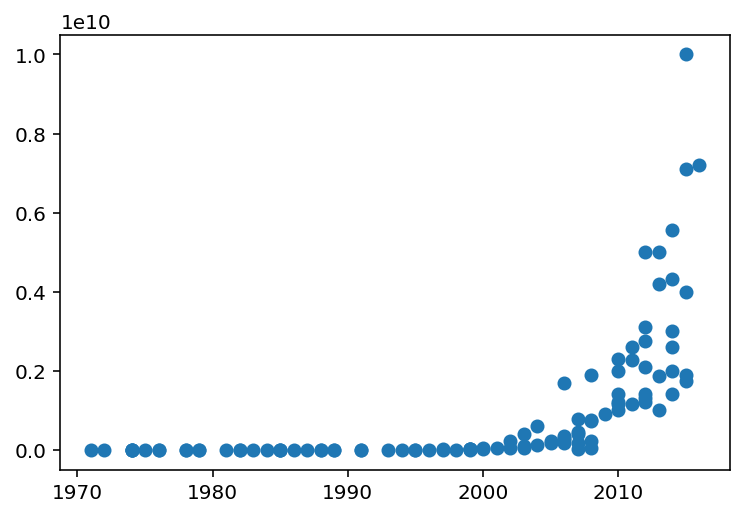

In [12]:
plt.scatter(x,y)
plt.show()

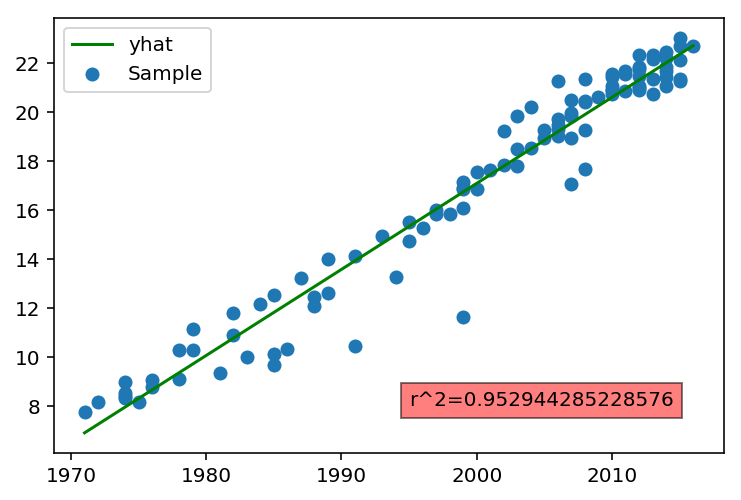

In [13]:
plt.scatter(x,np.log(y))
plt.plot(x,lin_re(x,np.log(y))[0],color='green')
plt.legend(['yhat','Sample'])
plt.text(1995,8,'r^2={}'.format(lin_re(x,np.log(y))[1]), bbox=dict(facecolor='red', alpha=0.5))
plt.show()

### Calculate the time that it takes to double in years
$\log(tc)=a*year+b$
<br/>
$tc=\exp(b)*\exp(a*year)$
<br/>
$2*tc=2*\exp(b)*\exp(a*year)$
<br/>
$2*tc=\exp(\ln{2}))*\exp(b)*\exp(a*year)$
<br/>
$2*tc=\exp(b)*\exp(a*year+\ln{2})$
<br/>
$a*year2=a*year1+\ln{2}$
<br/>
$year2=year1+\frac{\ln{2}}{a}$

In [18]:
print("time to double:",np.log(2)/lin_re(x,np.log(y))[2],"years")

time to double: 1.97453317238 years
